# Homework 5 Part 1

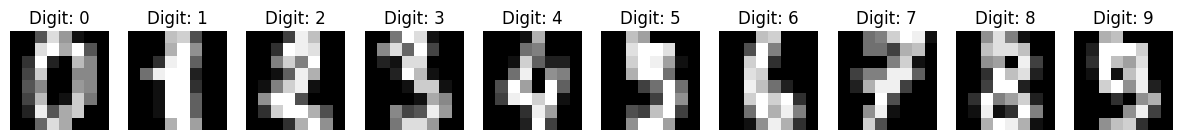

In [139]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

#loading in from the sklearn dataset
digits = load_digits();

#scaling the digits so mean is 0 and the variance is 1
scaled_digits = scale(digits.data)

#the ten clases , numbers 
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

for i in range(num_images):
    axes[i].imshow(digits.images[i], cmap='gray')
    axes[i].set_title(f"Digit: {digits.target[i]}")
    axes[i].axis('off')

plt.show()


In [140]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


#splitting into 33% testing and 67% training , random state 42 ensure reproducibility 
x_train, x_test, y_train, y_test = train_test_split(scaled_digits, digits.target, test_size=.33, random_state=42)

#trainign the svm classifier with rbf radial based function 
svm_classifier = SVC(kernel='rbf', C=100, random_state=42)
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set from the x_test
y_pred = svm_classifier.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("SVM Accuracy:", accuracy)
print("SVM Confusion Matrix:\n", conf_matrix)
print("SVM Classification Report:\n", class_report)




SVM Accuracy: 0.9797979797979798
SVM Confusion Matrix:
 [[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  2 53  0  1  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  1 71  0  0  0  1]
 [ 0  0  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  1  1  1  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  1  0  2 65]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      1.00      0.99        55
           2       0.95      1.00      0.97        52
           3       0.98      0.95      0.96        56
           4       0.98      1.00      0.99        64
           5       0.99      0.97      0.98        73
           6       0.98      1.00      0.99        57
           7       1.00      0.98      0.99        62
           8       0.96      0.94      0.95        52
           9       0.97      0.96      0.96 

Most common mistake: 3 misclassified as 2
Misclassified digits:


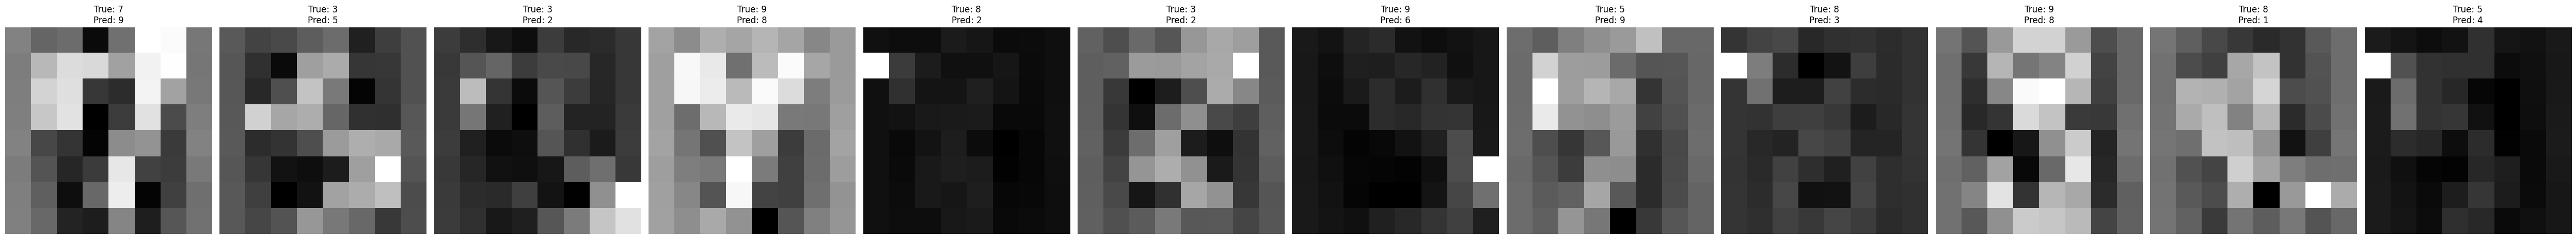

In [141]:
# Find the most common mistake
most_common_mistake = np.argmax(conf_matrix - np.diag(np.diag(conf_matrix)))
most_common_mistake_digit = np.unravel_index(most_common_mistake, conf_matrix.shape)
print(f"Most common mistake: {most_common_mistake_digit[0]} misclassified as {most_common_mistake_digit[1]}")


#plot misclassified digits
misclassified_indices = np.where(y_test != y_pred)[0]
def plot_images(images, true_labels, pred_labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(50, 8))
    for i in range(num_images):
        if i < len(images):
            axes[i].imshow(images[i].reshape(8, 8), cmap='gray')
            axes[i].set_title(f"True: {true_labels[i]}\nPred: {pred_labels[i]}")
            axes[i].axis('off')
    plt.tight_layout()
    plt.show()

print("Misclassified digits:")
plot_images(x_test[misclassified_indices], y_test[misclassified_indices], y_pred[misclassified_indices], num_images=len(misclassified_indices))


Best C value: 6.040404040404041
Best cross-validated accuracy: 0.9538053234292789


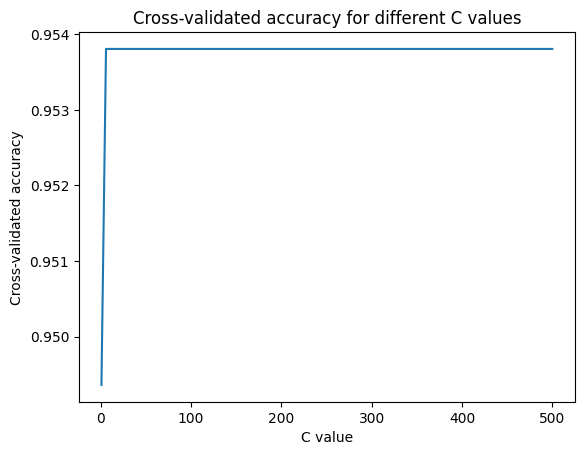

In [142]:
#cross val score function to evaluate accuracy 
C_values = np.linspace(1, 500, 100)
cross_val_scores = []

for C in C_values:
    svm_classifier = SVC(kernel='rbf', C=C, random_state=42)
    scores = cross_val_score(svm_classifier, scaled_digits, digits.target, cv=5)
    cross_val_scores.append(scores.mean())

best_C = C_values[np.argmax(cross_val_scores)]
print("Best C value:", best_C)
print("Best cross-validated accuracy:", max(cross_val_scores))

# Plot the cross-validation results
plt.plot(C_values, cross_val_scores)
plt.xlabel('C value')
plt.ylabel('Cross-validated accuracy')
plt.title('Cross-validated accuracy for different C values')
plt.show()

## RAW

In [143]:
#testing on raw not scaled data
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
svm_classifier_raw = SVC(kernel='rbf', C=100, random_state=42)
svm_classifier_raw.fit(X_train_raw, y_train_raw)
y_pred_raw = svm_classifier_raw.predict(X_test_raw)
accuracy_raw = accuracy_score(y_test_raw, y_pred_raw)
print("Accuracy on raw data:", accuracy_raw)

Accuracy on raw data: 0.9861111111111112


## KNN

In [144]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier


#splitting into 33% testing and 67% training , random state 42 ensure reproducibility 
knn_x_train, knn_x_test, knn_y_train, knn_y_test = train_test_split(scaled_digits, digits.target, test_size=.33, random_state=42)


knn_classifier = KNeighborsClassifier(n_neighbors=10)
#using the training data from before 
knn_classifier.fit(knn_x_train, knn_y_train)

knn_y_pred = knn_classifier.predict(knn_x_test)

knn_accuracy = accuracy_score(knn_y_test, knn_y_pred)
knn_conf_matrix = confusion_matrix(knn_y_test, knn_y_pred)
knn_class_report = classification_report(knn_y_test, knn_y_pred)

print("KNN Accuracy:", knn_accuracy)
print("KNN Confusion Matrix:\n", knn_conf_matrix)
print("KNN Classification Report:\n", knn_class_report)



KNN Accuracy: 0.968013468013468
KNN Confusion Matrix:
 [[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  0  1  1  0  0]
 [ 0  0  0  0 63  0  0  1  0  0]
 [ 0  1  0  0  1 69  1  0  0  1]
 [ 1  0  0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0  1  0 60  1  0]
 [ 0  3  0  0  0  0  0  0 49  0]
 [ 0  0  0  2  1  1  1  0  0 63]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.93      1.00      0.96        55
           2       0.98      1.00      0.99        52
           3       0.96      0.95      0.95        56
           4       0.97      0.98      0.98        64
           5       0.97      0.95      0.96        73
           6       0.95      0.98      0.97        57
           7       0.97      0.97      0.97        62
           8       0.98      0.94      0.96        52
           9       0.98      0.93      0.95  

Most common mistake: 3 misclassified as 2
Misclassified digits:


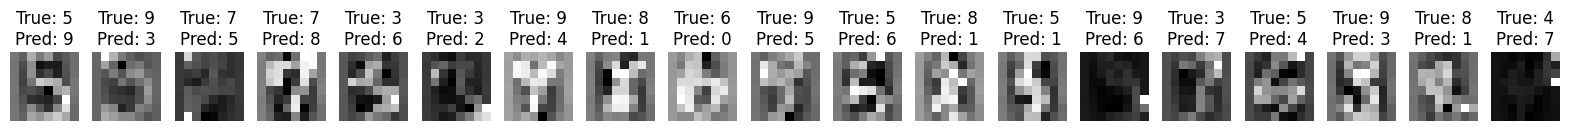

In [145]:
# most common mistake
knn_most_common_mistake = np.argmax(conf_matrix - np.diag(np.diag(knn_conf_matrix)))
knn_most_common_mistake_digit = np.unravel_index(most_common_mistake, knn_conf_matrix.shape)

print(f"Most common mistake: {knn_most_common_mistake_digit[0]} misclassified as {knn_most_common_mistake_digit[1]}")


#plot KNN misclassified digits
knn_misclassified_indices = np.where(knn_y_test != knn_y_pred)[0]
def plot_images(images, true_labels, pred_labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 3))
    for i in range(num_images):
        if i < len(images):
            axes[i].imshow(images[i].reshape(8, 8), cmap='gray')
            axes[i].set_title(f"True: {true_labels[i]}\nPred: {pred_labels[i]}")
            axes[i].axis('off')
    plt.show()

print("Misclassified digits:")
plot_images(knn_x_test[knn_misclassified_indices], knn_y_test[knn_misclassified_indices], knn_y_pred[knn_misclassified_indices], num_images=len(knn_misclassified_indices))

best k value: 3
best cross-validation accuracy: 0.9449257195914577


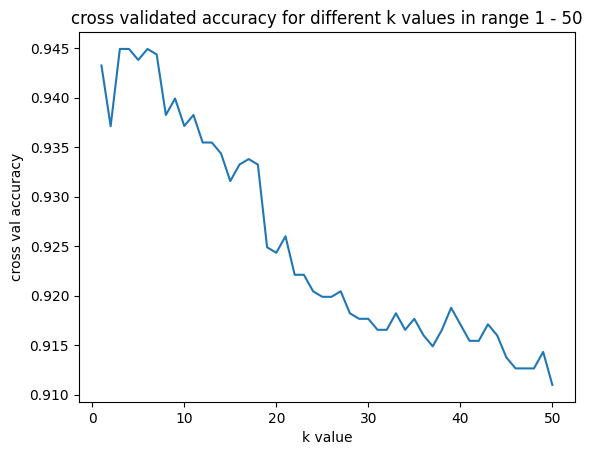

In [146]:
#try to find the best k value for these predictions 

k_values = range(1,51)
k_cross_val_scores = []

for k in k_values:
    best_knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(best_knn_classifier, scaled_digits, digits.target, cv=5)
    k_cross_val_scores.append(scores.mean())

best_k_found = k_values[np.argmax(k_cross_val_scores)]

print("best k value:", best_k_found)
print("best cross-validation accuracy:", max(k_cross_val_scores))

plt.plot(k_values, k_cross_val_scores)
plt.xlabel('k value')
plt.ylabel('cross val accuracy')
plt.title('cross validated accuracy for different k values in range 1 - 50')
plt.show()
    


# Part 2

In [147]:
import pandas as pd

news_data_csv = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')

#print(news_data_csv.columns)
#dropping two columns we dont need
news_data_csv = news_data_csv.drop(columns=['url', ' timedelta'])


#extracting the shares number
shares_number = news_data_csv[' shares'].values

# Use the DataFrame.values() method to export the predictor variables as a numpy array. This array should not include our target variable (the number of shares)
pred_values = news_data_csv.drop(columns=[' shares']).values

#We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, which indicates whether or not each article is popular.
median_shares = np.median(shares_number)
shares_binary = (shares_number > median_shares).astype(int)

# print(f'predicted values shape: {pred_values.shape}')
# print(f'traget variable shape: {shares_binary}')


## exploratory data analysis
### First check to see if the values are reasonable. What are the min, median, and maximum number of shares?

In [148]:
print("median shares: ", median_shares)
min_shares = np.min(shares_number)
print("min shares: ", min_shares)
max_shares = np.max(shares_number)
print("max shares: ", max_shares)

median shares:  1400.0
min shares:  1
max shares:  843300


## classification using KNN
### Develop a KNN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data?

In [149]:
#training and testing data on the shares data 
x_train, x_test, y_train, y_test = train_test_split(pred_values, shares_binary, test_size= .33, random_state=42)

print(f'Training set shape: {x_train.shape}, {y_train.shape}')
print(f'Test set shape: {x_test.shape}, {y_test.shape}')



#cross validation 
k_range = range(1,21)
cross_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #cv 10 for 10 fold 
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cross_scores.append(scores.mean())

found_k = k_range[np.argmax(cross_scores)]
print(f'best k found: {found_k}')

#train a knn model with the best k that was found now
best_k_knn = KNeighborsClassifier(n_neighbors=found_k)
best_k_knn.fit(x_train, y_train)

#predit using the trained knn model on the test data
prediction = best_k_knn.predict(x_test)

accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy on the test data : {accuracy}')





Training set shape: (26561, 58), (26561,)
Test set shape: (13083, 58), (13083,)
best k found: 15
Accuracy on the test data : 0.5754796300542689


## classification using SVM
 
### Develop a support vector machine classification model for the data.
- SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles.
- Experiment with different Cs. Which is the best value for C?
- Note that it may take multiple minutes per value of C to run on the whole dataset!

In [150]:
# select 5000 articles from the csv file

svm_subset_articles = news_data_csv.sample(n=5000, random_state=42)

#prepare training and testing data again on this 
#pred values is the csv without the shares and the shares binary is a t or f if the article has > median shares count
svm_news_x_train, svm_news_x_test, svm_news_y_train, svm_news_y_test = train_test_split(pred_values, shares_binary, test_size= .33, random_state=42)


C_values = [1, 6, 10, 50, 65, 75, 100, 120, 200, 250, 400, 500, 600, 650, 700, 800, 1000]

for C in C_values:
        svm_news_classifier = SVC(kernel='rbf', C=C)

        #train with rbf kernal on the data
        svm_news_classifier.fit(svm_news_x_train, svm_news_y_train)

        svm_news_pred = svm_news_classifier.predict(svm_news_x_test)

        #use the predictrion compare to the y test
        accurary_svm_news = accuracy_score(svm_news_y_test, svm_news_pred)
        print(f'Accuracy on test data for svm with C = {C}: {accurary_svm_news} ' )







Accuracy on test data for svm with C = 1: 0.5422303752961859 
Accuracy on test data for svm with C = 6: 0.5582053045937476 
Accuracy on test data for svm with C = 10: 0.5616448826721699 
Accuracy on test data for svm with C = 50: 0.5809829549797447 
Accuracy on test data for svm with C = 65: 0.5840403577161202 
Accuracy on test data for svm with C = 75: 0.586180539631583 
Accuracy on test data for svm with C = 100: 0.5893908125047772 
Accuracy on test data for svm with C = 120: 0.5919131697622869 
Accuracy on test data for svm with C = 200: 0.596269968661622 
Accuracy on test data for svm with C = 250: 0.5976457998929909 
Accuracy on test data for svm with C = 400: 0.6021554689291447 
Accuracy on test data for svm with C = 500: 0.6036077352289231 
Accuracy on test data for svm with C = 600: 0.6050600015287013 
Accuracy on test data for svm with C = 650: 0.6047542612550638 
Accuracy on test data for svm with C = 700: 0.6049835664602919 
Accuracy on test data for svm with C = 800: 0.6054

## classification using decision trees
- Develop a decision tree classification model for the data.
- Use cross validation to choose good values of the max tree depth (max_depth) and minimum samples split (min_samples_split).

In [151]:
from sklearn.tree import DecisionTreeClassifier

tree_subset_articles = news_data_csv

dt_news_x_train, dt_news_x_test, dt_news_y_train, dt_news_y_test = train_test_split(pred_values, shares_binary, test_size=.33, random_state=42)

#cross val to determine the best value for depth and sample split

max_depth = [None, 10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10, 20, 30]

best_accuracy = 0.0
best_param = {}




for depth in max_depth:
    for split in min_samples_split:
        dtree_classifier = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=42)
        dtree_classifier.fit(dt_news_x_train, dt_news_y_train)
        dtree_preds = dtree_classifier.predict(dt_news_x_test)

        accuracy = accuracy_score(dt_news_y_test, dtree_preds)
        print(f"accuracy on test with max depth of {depth} and sample split of {split} is : {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_param = {'max_depth': depth, 'min_samples_split': split}


print(f'Best parameters: {best_param}')
print(f'Best accuracy: {best_accuracy}')              



accuracy on test with max depth of None and sample split of 2 is : 0.580830084842926
accuracy on test with max depth of None and sample split of 5 is : 0.5833524421004357
accuracy on test with max depth of None and sample split of 10 is : 0.5795306886799664
accuracy on test with max depth of None and sample split of 20 is : 0.5857219292211266
accuracy on test with max depth of None and sample split of 30 is : 0.588550026752274
accuracy on test with max depth of 10 and sample split of 2 is : 0.6236337231521822
accuracy on test with max depth of 10 and sample split of 5 is : 0.6222578919208133
accuracy on test with max depth of 10 and sample split of 10 is : 0.6225636321944508
accuracy on test with max depth of 10 and sample split of 20 is : 0.6221050217839945
accuracy on test with max depth of 10 and sample split of 30 is : 0.6196590995948942
accuracy on test with max depth of 20 and sample split of 2 is : 0.5909195138729649
accuracy on test with max depth of 20 and sample split of 5 is

## describing the findings

- Which method (k-NN, SVM, Decision Tree) worked best?
in my experiments, the Decision Tree seems to have the highest accuracy with: `0.623` when using a max depth of 10 and a sample split of 2. this is followed by the SVM which had an accuracy of `0.605` when the C value was 800. Then, the k-NN had an accuracy of `0.57` when using the best found k value of 15.

- How did different parameters influence the accuracy?
Testing the different parameters should a subtle variance of accuracy within all three of the methods. I looped through a range of each of the parameters in each of the methods to find which provided the best trained prediction. 

- Which model is easiest to interpret?
Decision trees are the easiest to interpret because it is clear to see the logic for how classifications of data are made. In my model, the best decision tree had a max level of 10, meaning there were 10 if else conditions to classify the data. 

- How would you interpret your results?
Each model roughly had an accuracy of predicting the popularity of the posts near 60%. this prediction is based on various attributes suc has length, images, day of the week of posting, and content within the article. This percentage is not incredibly high, but it is above 50%, implying a majority of the test articles that the models predicted to have greater shares than the median was accurate. I interperet these overall results that there is some reasonable ways to predict the share rate of results based on many attributes of the article, but not with great confidence. 